### Import packages for model development

In [1]:
# import libraries for data manipulation
import pandas as pd
from matplotlib import pyplot as plt

#import libraries for model training
from sklearn.metrics import auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
plt.rcParams["figure.figsize"] = [15, 7]

### Import credit card dataset

In [2]:
df = pd.read_csv('../../datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = df.drop(columns='Class')
y = df['Class']

In [4]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

### Model Development

#### Train Baseline Model

In [5]:
# define model
model = DecisionTreeClassifier(random_state=1)
# fit on unbalanced training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Train Model on Balanced Data

In [6]:
base_classifier = DecisionTreeClassifier(random_state= 1)
balanced_bagging = BalancedBaggingClassifier(base_classifier, sampling_strategy='auto', random_state=42)
balanced_bagging.fit(X_train, y_train)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                          random_state=42)

### Model Evaluation

In [7]:
# predict probabilities using unbalanced model
yhat_ub = model.predict_proba(X_holdout)
# retrieve just the probabilities for the positive class
pos_probs_ub = yhat_ub[:, 1]
# predict classes on holdout data using unbalanced model
y_pred_ub = model.predict(X_holdout)

In [8]:
# predict probabilities using balanced model
yhat_bb = balanced_bagging.predict_proba(X_holdout)
# retrieve just the probabilities for the positive class
pos_probs_bb = yhat_bb[:,1]
# predict classes on holdout data using balanced model
y_pred_bb = balanced_bagging.predict(X_holdout)

#### Classification Report

In [9]:
# print classification report for unbalanced model
print('Classification Report for Model Trained on Imbalanced Data')
print(classification_report(y_holdout, y_pred_ub))
# print classification report for balanced model
print('Classification Report for Model Trained on Balanced Data')
print(classification_report(y_holdout, y_pred_bb))

Classification Report for Model Trained on Imbalanced Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.84      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Classification Report for Model Trained on Balanced Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



#### Confusion Matrix

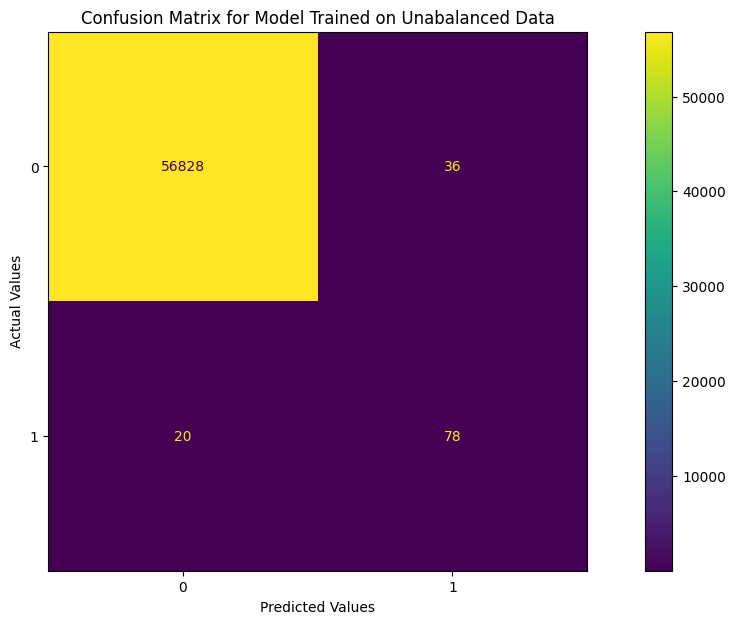

In [10]:
cm_ub = confusion_matrix(y_holdout, y_pred_ub)
ConfusionMatrixDisplay(cm_ub).plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Model Trained on Unabalanced Data');

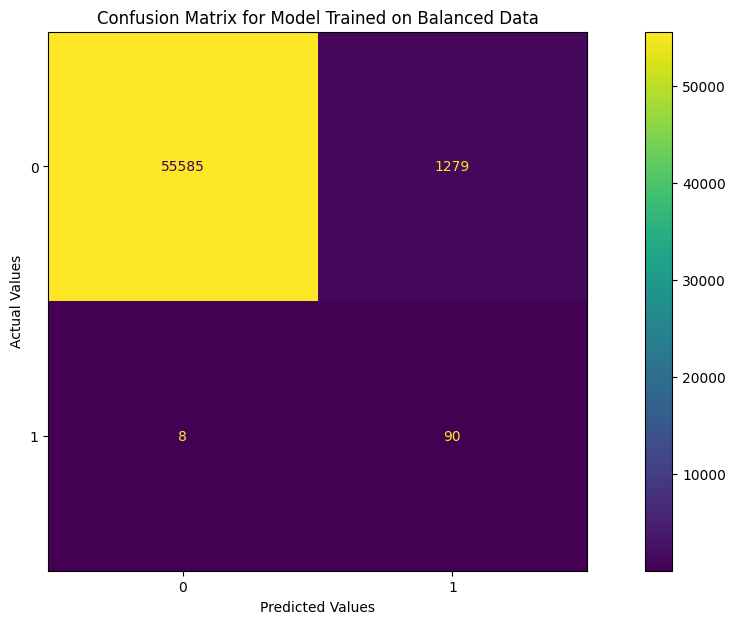

In [11]:
y_pred_bb = balanced_bagging.predict(X_holdout)
cm_b = confusion_matrix(y_holdout, y_pred_bb)
ConfusionMatrixDisplay(cm_b).plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Model Trained on Balanced Data');

#### Receiver's Operating Charasteristic (ROC) Curve

Unbalanced ROC AUC 0.898
Balanced ROC AUC 0.979


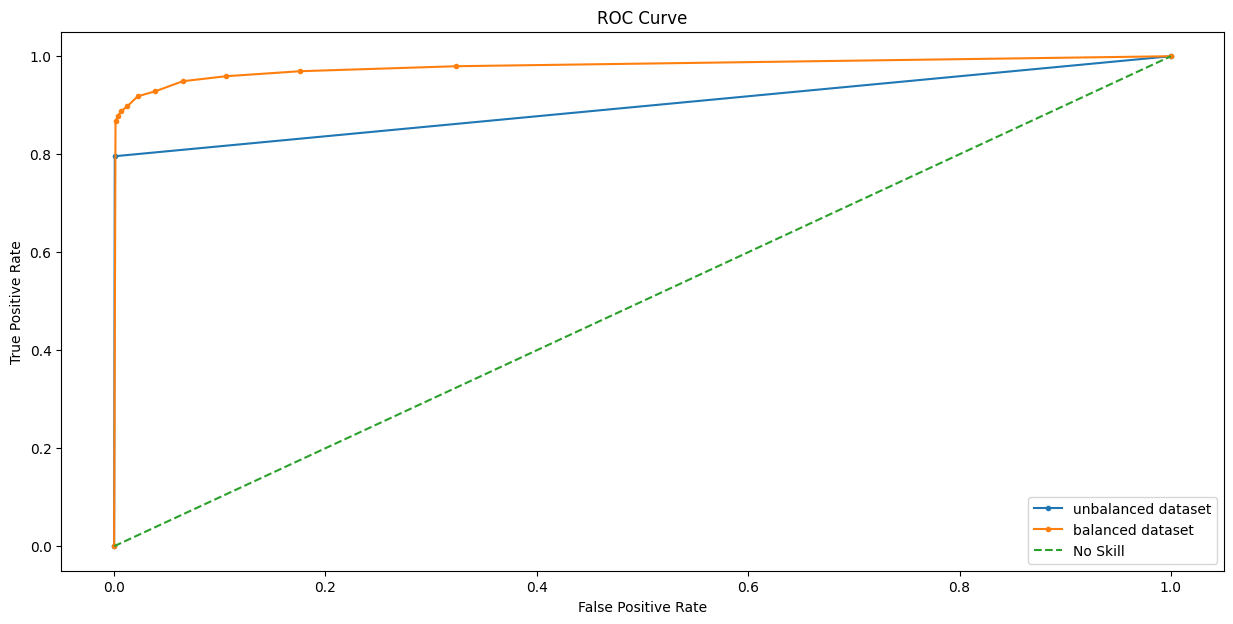

In [12]:
# calculate roc curve for unbalanced model
fpr_ub, tpr_ub, _ = roc_curve(y_holdout, pos_probs_ub)
# plot unbalanced model roc curve
plt.plot(fpr_ub, tpr_ub, marker='.', label='unbalanced dataset')

# calculate roc curve for balanced model
fpr_bb, tpr_bb, _ = roc_curve(y_holdout, pos_probs_bb)
# plot balanced model roc curve
plt.plot(fpr_bb, tpr_bb, marker='.', label='balanced dataset')

# axis labels
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('ROC Curve')

# calculate the unbalanced roc auc
roc_auc_ub = roc_auc_score(y_holdout, pos_probs_ub)
print('Unbalanced ROC AUC %.3f' % roc_auc_ub)

# calculate the balanced roc auc
roc_auc_bb = roc_auc_score(y_holdout, pos_probs_bb)
print('Balanced ROC AUC %.3f' % roc_auc_bb)

#### Precision Recall Curve

Unbalanced PR AUC: 0.740
Balanced PR AUC: 0.676


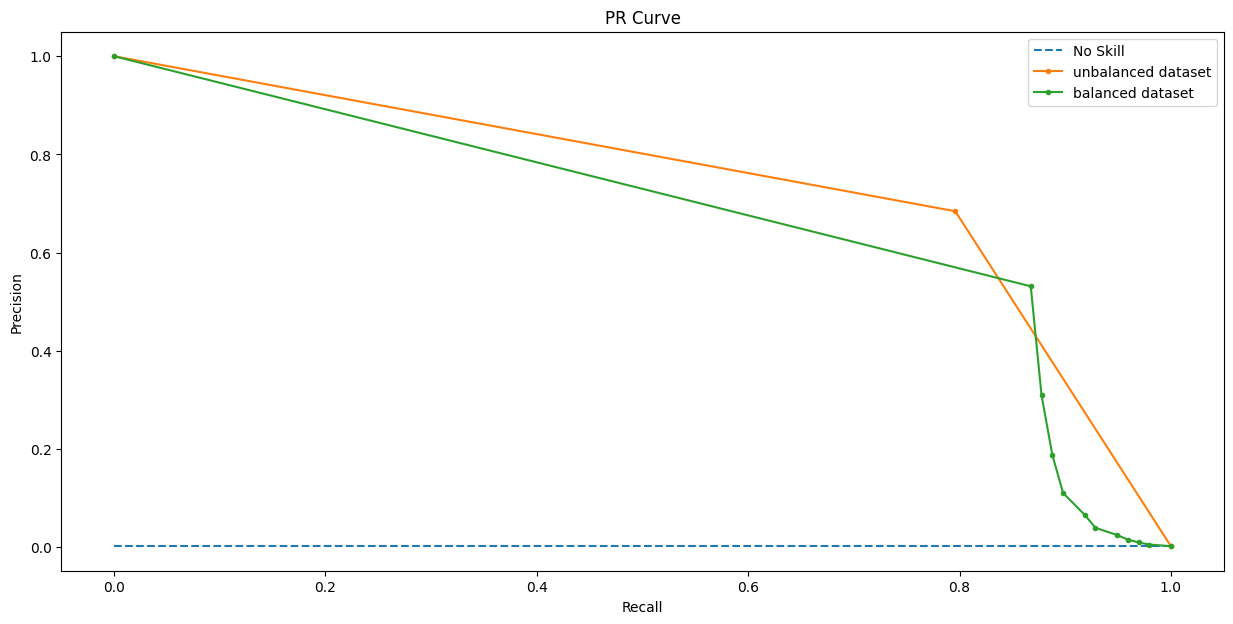

In [13]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate unbalanced model precision-recall curve
precision_ub, recall_ub, _ = precision_recall_curve(y_holdout, pos_probs_ub)
# plot the unbalanced model precision-recall curve
plt.plot(recall_ub, precision_ub, marker='.', label='unbalanced dataset')
# calculate balanced model precision-recall curve
precision_bb, recall_bb, _ = precision_recall_curve(y_holdout, pos_probs_bb)
# plot the balanced model precision-recall curve
plt.plot(recall_bb, precision_bb, marker='.', label='balanced dataset')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.title('PR Curve')

# calculate the unbalanced precision-recall auc
pr_auc_ub = auc(recall_ub, precision_ub)
print('Unbalanced PR AUC: %.3f' % pr_auc_ub)

# calculate the balanced precision-recall auc
pr_auc_bb = auc(recall_bb, precision_bb)
print('Balanced PR AUC: %.3f' % pr_auc_bb)